In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('ricebeefcoffee.csv')

In [3]:
# We have data from Feb 1992 -> Jan 2022
df.head()

,Year,Month,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl
0,1992,Feb,2.52,0.28,1.51,89.59,0.53,4.78,2.86
1,1992,Mar,2.45,0.28,1.55,89.59,0.53,4.64,2.94
2,1992,Apr,2.38,0.28,1.45,89.59,0.53,4.51,2.75
3,1992,May,2.38,0.27,1.34,89.59,0.51,4.51,2.54
4,1992,Jun,2.33,0.27,1.30,89.59,0.51,4.42,2.46


### Let's use inflated prices so we can compare them

In [4]:
df.columns

Index(['Year', 'Month', 'Price_beef_kilo', 'Price_rice_kilo',
       'Price_coffee_kilo', 'Inflation_rate', 'Price_rice_infl',
       'Price_beef_infl', 'Price_coffee_infl'],
      dtype='object')

In [5]:
df = df.drop(['Price_coffee_kilo', 'Price_beef_kilo', 'Price_rice_kilo', 'Inflation_rate'], axis=1)

In [6]:
df

,Year,Month,Price_rice_infl,Price_beef_infl,Price_coffee_infl
0,1992,Feb,0.53,4.78,2.86
1,1992,Mar,0.53,4.64,2.94
2,1992,Apr,0.53,4.51,2.75
3,1992,May,0.51,4.51,2.54
4,1992,Jun,0.51,4.42,2.46
...,...,...,...,...,...
355,2021,Sep,0.39,5.59,4.91
356,2021,Oct,0.39,5.63,5.24
357,2021,Nov,0.39,5.87,5.64
358,2021,Dec,0.39,5.87,5.83


#### For simple year comparison, we can drop month and compare with years

In [7]:
df = df.drop('Month', axis=1)

In [8]:
# Group by Year with average -> remove years with missing values
df = df.groupby('Year').mean().dropna()

<Axes: >

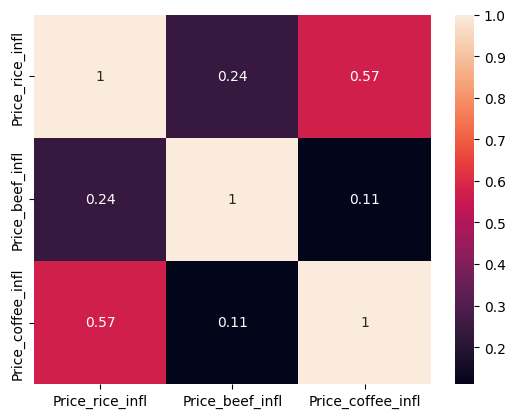

In [9]:
correlations = df.corr(numeric_only=True)
sns.heatmap(correlations, annot=True)

<Axes: ylabel='Year'>

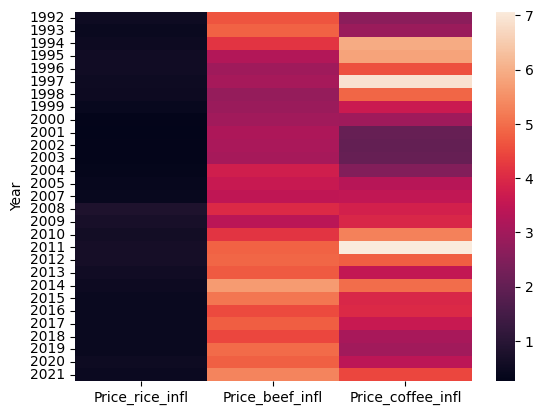

In [10]:
# High rise in coffee prize in 1997 and 2011
sns.heatmap(df, xticklabels=True, yticklabels=True)

In [11]:
# reload dataset and try with year + month => pivot table and heatmap
df = pd.read_csv("ricebeefcoffee.csv")

# drop the unneeded columns
df = df.drop(['Price_beef_kilo', 'Price_rice_kilo',
       'Price_coffee_kilo', 'Inflation_rate'], axis=1)

# import calendar module to help with month name => number conversion
from calendar import month_abbr

lower_ma = [m.lower() for m in month_abbr]

# one-liner with Pandas
df['Month'] = df['Month'].str.lower().map(lambda m: lower_ma.index(m)).astype('Int8')

In [12]:
df.head()

,Year,Month,Price_rice_infl,Price_beef_infl,Price_coffee_infl
0,1992,2,0.53,4.78,2.86
1,1992,3,0.53,4.64,2.94
2,1992,4,0.53,4.51,2.75
3,1992,5,0.51,4.51,2.54
4,1992,6,0.51,4.42,2.46


<Axes: xlabel='Year', ylabel='Month'>

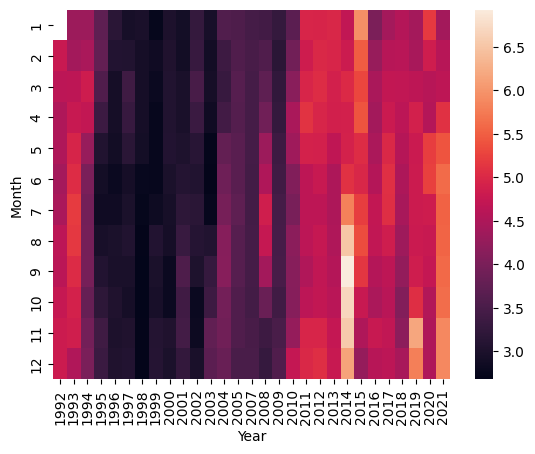

In [13]:
# You can filter pivot table with any of the three products, rice, beef, coffee
df_pivot = df.pivot_table(index='Month', columns='Year', values='Price_beef_infl')
sns.heatmap(df_pivot, xticklabels=True, yticklabels=True)